# PROJECT : CASE STUDY 

## Description

This dataset has funding information of the Indian startups from January 2015 to August 2017.

Feature Details :

1. SNo - Serial number.

2. Date - Date of funding in format DD/MM/YYYY.

3. StartupName - Name of the startup which got funded.

4. IndustryVertical - Industry to which the startup belongs.

5. SubVertical - Sub-category of the industry type.

6. CityLocation - City which the startup is based out of.

7. InvestorsName - Name of the investors involved in the funding round.

8. InvestmentType - Either Private Equity or Seed Funding.

9. AmountInUSD - Funding Amount in USD.

10. Remarks - Other information, if any.

Insights -

1. Find out what type of startups are getting funded in the last few years?

2. Who are the important investors?

3. What are the hot fields that get a lot of funding these days?

In this section, you need to try to find out answer to the given questions using the solutions you have done in Case Study (part 1) or you might need to write code to find the answers.

Find out answer for each question.

### Data Set Link
https://drive.google.com/file/d/1Cw4D6neR3hoJzTupuJJz6YZ0Bk1R_0Cf/view?usp=share_link

### Creating Path

In [1]:
path = 'startup_funding.csv'

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import csv
import warnings
import matplotlib.pyplot as plt
from collections import OrderedDict

## Case Study : Questions

###  Question 1
 Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance.But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi.Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding.Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

###  Solution

Bangalore 637
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


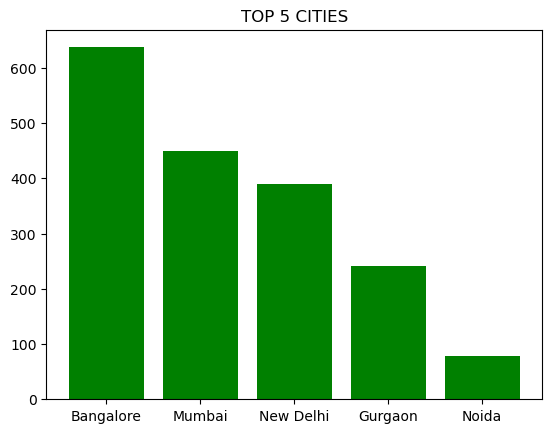

In [3]:
## LOAD DATASET
df = pd.read_csv(path)
df = df.copy()
df.replace(np.nan, 0, inplace = True)
## creating new city column

def extract_city(city) :
    city = str(city)
    if city == '0' :
        return ''
    city_list = city.split('/')
    city1 = city_list[0]
    city1 = city1[0].upper() + city1[1 : ]
    if city1 == 'Delhi' :
        return 'New Delhi'
    if (len(city_list) > 1) :
        city2 = city_list[1]
        city2 = city2.lower().strip()
        if city2 == 'bangalore' :
            return 'Bangalore'
    return city1.strip()
new_col = df.CityLocation.apply(extract_city)
del df['CityLocation']
df['CityLocation'] = new_col

valid_cities = ('Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'New Delhi')
valid_df = df[(df.CityLocation == 'Bangalore') | (df.CityLocation == 'Mumbai') | (df.CityLocation == 'Gurgaon') 
       | (df.CityLocation == 'Noida') | (df.CityLocation == 'New Delhi')]

myDict = valid_df.CityLocation.value_counts().to_dict()
cities = list(myDict.keys())
freq = list(myDict.values())
for i in range(len(cities)) :
    print(cities[i], freq[i])
plt.bar(cities, freq, color = 'green')
plt.title('TOP 5 CITIES')
plt.show()

### Question 2

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

### Solution

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


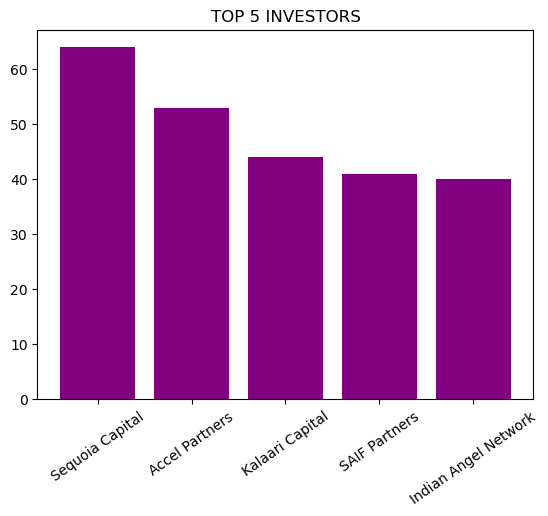

In [4]:
df = pd.read_csv(path)
df.replace(np.nan, '0', inplace = True)
def return_all_investors(InvestorsName) :
    names = list(InvestorsName)
    all_names = list()
    for big_name_string in names :
        big_name_list = big_name_string.split(',')
        for name in big_name_list :
            name = name.strip()
            name = name.split('/')
            for Final_name in name :
                all_names.append(Final_name.strip())
    return all_names
all_names = return_all_investors(df.InvestorsName)
sample = pd.DataFrame()
sample['Investors'] = all_names
## cleaning
def remove_garbage(name) :
    name = str(name)
    if name == '0' :
        return ''
    if 'undisclosed' in name.lower().strip() :
        return ''
    if 'other' in name.lower().strip() :
        return ''
    return name.strip()
new_col = sample.Investors.apply(remove_garbage)
del sample['Investors']
sample['names'] = new_col
sample = sample[sample.names != '']

myDict = sample.names.value_counts().to_dict()
## top 5
names = list(myDict.keys())[0 : 5]
freq = list(myDict.values())[0 : 5]

for i in range(5) :
    print(names[i], freq[i])
## plotting
plt.bar(names, freq, color = 'purple')
plt.title('TOP 5 INVESTORS')
plt.xticks(rotation = 35)
plt.show()

### Question 3
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

### Solution

Sequoia Capital 48
Accel Partners 46
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


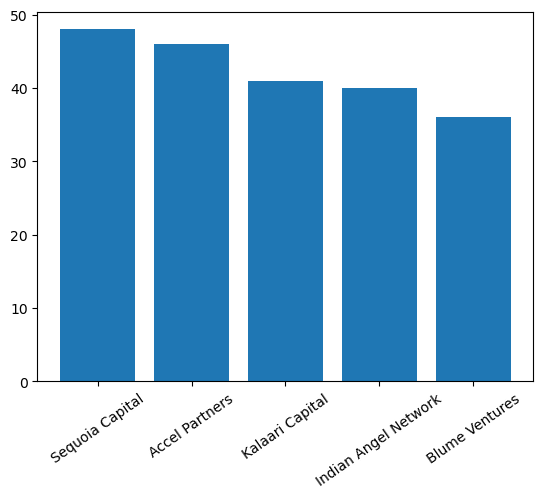

In [5]:
## top 5 investors VS startups
df = pd.read_csv(path)
df.replace(np.nan, '', inplace = True)
sample = pd.DataFrame()
sample['names'] = df.InvestorsName
sample['startups'] = df.StartupName
sample = sample[sample.names != '']

def remove_undisclosed(name) :
    name = str(name)
    if name.lower().strip().startswith('undisclosed') :
        return ''
    else :
        return name
new_col = sample.names.apply(remove_undisclosed)
del sample['names']
sample['names'] = new_col

def return_imp(startup) :
    startup = str(startup)
    lower = startup.lower().split()
    lower = lower[0]
    if lower.startswith('oyo') and startup != 'OYOfit':
        return 'Oyo'
    elif lower.startswith('flipkart') :
        return 'Flipkart'
    elif lower.startswith('ola') :
        return 'Ola'
    elif lower.startswith('paytm') :
        return 'Paytm'
    else :
        return startup

new_col = sample.startups.apply(return_imp)
del sample['startups']
sample['startups'] = new_col


sample.names.replace('& others', '', inplace = True)
sample.names.replace('& Others', '', inplace = True)
sample.names.replace('&others', '', inplace = True)
sample.names.replace('&Others', '', inplace = True)

# name wise startup

myDict = dict()
name_list = list(sample.names)
companies = list(sample.startups)

for i in range(len(companies)) :
    big_name_string = name_list[i].strip()
    big_name_list = big_name_string.split(',')
    for Name in big_name_list :
        Name = Name.strip()
        Final_name_list = Name.split('/')
        for Final_name in Final_name_list :
            Final_name = Final_name.strip()
            val = myDict.get(Final_name)
            if not val :
                myDict[Final_name] = set()
                myDict[Final_name].add(companies[i])
            else :
                myDict[Final_name].add(companies[i])

for key in myDict :
    myDict[key] = len(myDict[key])

keys = list(myDict.keys())
values = list(myDict.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

myDict = OrderedDict(reversed(list(sorted_dict.items())))

del myDict['']

names = list(myDict.keys())[0 : 5]
freq = list(myDict.values())[0 : 5]

for i in range(len(names)) :
    print(names[i], freq[i])

## plotting graph

plt.bar(names, freq)
plt.xticks(rotation = 35)
plt.show()

### Question 4
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

### Solution

Indian Angel Network 33
Rajan Anandan 23
Anupam Mittal 16
LetsVenture 16
Group of Angel Investors 14


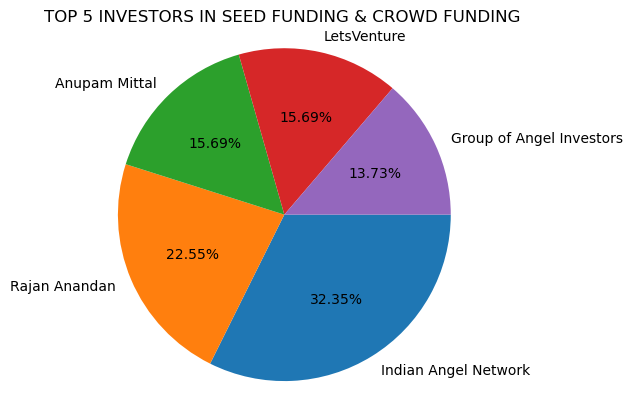

In [6]:
df = pd.read_csv(path)
df.replace(np.nan, '', inplace = True)
sample = pd.DataFrame()
sample['names'] = df.InvestorsName
sample['startups'] = df.StartupName
sample = sample[sample.names != '']

def remove_undisclosed(name) :
    name = str(name)
    if name.lower().strip().startswith('undisclosed') :
        return ''
    else :
        return name
new_col = sample.names.apply(remove_undisclosed)
del sample['names']
sample['names'] = new_col

def return_imp(startup) :
    startup = str(startup)
    lower = startup.lower().split()
    lower = lower[0]
    if lower.startswith('oyo') and startup != 'OYOfit':
        return 'Oyo'
    elif lower.startswith('flipkart') :
        return 'Flipkart'
    elif lower.startswith('ola') :
        return 'Ola'
    elif lower.startswith('paytm') :
        return 'Paytm'
    else :
        return startup

new_col = sample.startups.apply(return_imp)
del sample['startups']
sample['startups'] = new_col
def clean_type(types) :
    types = str(types)
    if types.lower().replace(' ', '').strip() == 'privateequity' :
        return  "Private Equity"
    elif types.lower().replace(' ', '').strip() == 'seedfunding' :
        return 'Seed Funding'
    elif types.lower().replace(' ', '').strip() == 'debtfunding' :
        return 'Debt Funding'
    elif types.lower().replace(' ', '').strip() == 'crowdfunding' :
        return 'Crowd Funding'
    else :
        return types

sample['types'] = df.InvestmentType.apply(clean_type)

sample.names.replace('& others', '', inplace = True)
sample.names.replace('& Others', '', inplace = True)
sample.names.replace('&others', '', inplace = True)
sample.names.replace('&Others', '', inplace = True)

# name wise startup

myDict = dict()
name_list = list(sample.names)
companies = list(sample.startups)
types = list(sample.types)

for i in range(len(companies)) :
    if types[i] != 'Crowd Funding' and types[i] != 'Seed Funding' :
        continue
    big_name_string = name_list[i].strip()
    big_name_list = big_name_string.split(',')
    for Name in big_name_list :
        Name = Name.strip()
        Final_name_list = Name.split('/')
        for Final_name in Final_name_list :
            Final_name = Final_name.strip()
            val = myDict.get(Final_name)
            if not val :
                myDict[Final_name] = set()
                myDict[Final_name].add(companies[i])
            else :
                myDict[Final_name].add(companies[i])

for key in myDict :
    myDict[key] = len(myDict[key])

keys = list(myDict.keys())
values = list(myDict.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

myDict = OrderedDict(reversed(list(sorted_dict.items())))

del myDict['']

names = list(myDict.keys())[0 : 5]
freq = list(myDict.values())[0 : 5]

for i in range(len(names)) :
    print(names[i], freq[i])

## plotting graph

plt.pie(freq, labels = names, autopct = '%.2f%%', counterclock = False)
plt.axis('equal')
plt.title('TOP 5 INVESTORS IN SEED FUNDING & CROWD FUNDING')
plt.show()

### Question 5
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

### Solution

Sequoia Capital 45
Accel Partners 42
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


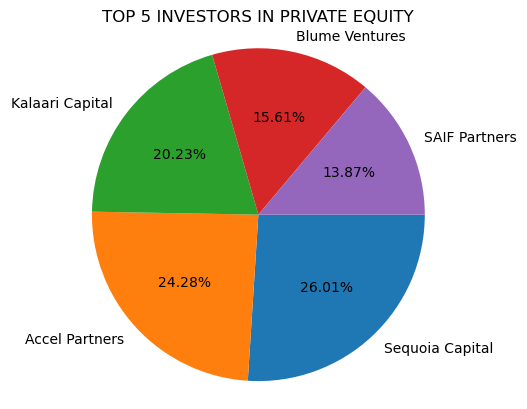

In [7]:
df = pd.read_csv(path)
df.replace(np.nan, '', inplace = True)
sample = pd.DataFrame()
sample['names'] = df.InvestorsName
sample['startups'] = df.StartupName
sample = sample[sample.names != '']

def remove_undisclosed(name) :
    name = str(name)
    if name.lower().strip().startswith('undisclosed') :
        return ''
    else :
        return name
new_col = sample.names.apply(remove_undisclosed)
del sample['names']
sample['names'] = new_col

def return_imp(startup) :
    startup = str(startup)
    lower = startup.lower().split()
    lower = lower[0]
    if lower.startswith('oyo') and startup != 'OYOfit':
        return 'Oyo'
    elif lower.startswith('flipkart') :
        return 'Flipkart'
    elif lower.startswith('ola') :
        return 'Ola'
    elif lower.startswith('paytm') :
        return 'Paytm'
    else :
        return startup

new_col = sample.startups.apply(return_imp)
del sample['startups']
sample['startups'] = new_col
def clean_type(types) :
    types = str(types)
    if types.lower().replace(' ', '').strip() == 'privateequity' :
        return  "Private Equity"
    elif types.lower().replace(' ', '').strip() == 'seedfunding' :
        return 'Seed Funding'
    elif types.lower().replace(' ', '').strip() == 'debtfunding' :
        return 'Debt Funding'
    elif types.lower().replace(' ', '').strip() == 'crowdfunding' :
        return 'Crowd Funding'
    else :
        return types

sample['types'] = df.InvestmentType.apply(clean_type)

sample.names.replace('& others', '', inplace = True)
sample.names.replace('& Others', '', inplace = True)
sample.names.replace('&others', '', inplace = True)
sample.names.replace('&Others', '', inplace = True)

# name wise startup

myDict = dict()
name_list = list(sample.names)
companies = list(sample.startups)
types = list(sample.types)

for i in range(len(companies)) :
    if types[i] != 'Private Equity' :
        continue
    big_name_string = name_list[i].strip()
    big_name_list = big_name_string.split(',')
    for Name in big_name_list :
        Name = Name.strip()
        Final_name_list = Name.split('/')
        for Final_name in Final_name_list :
            Final_name = Final_name.strip()
            val = myDict.get(Final_name)
            if not val :
                myDict[Final_name] = set()
                myDict[Final_name].add(companies[i])
            else :
                myDict[Final_name].add(companies[i])

for key in myDict :
    myDict[key] = len(myDict[key])

keys = list(myDict.keys())
values = list(myDict.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

myDict = OrderedDict(reversed(list(sorted_dict.items())))

del myDict['']

names = list(myDict.keys())[0 : 5]
freq = list(myDict.values())[0 : 5]

for i in range(len(names)) :
    print(names[i], freq[i])

## plotting graph

plt.pie(freq, labels = names, autopct = '%.2f%%', counterclock = False)
plt.axis('equal')
plt.title('TOP 5 INVESTORS IN PRIVATE EQUITY')
plt.show()

## SUBMITTED BY - PRATEEK SARNA